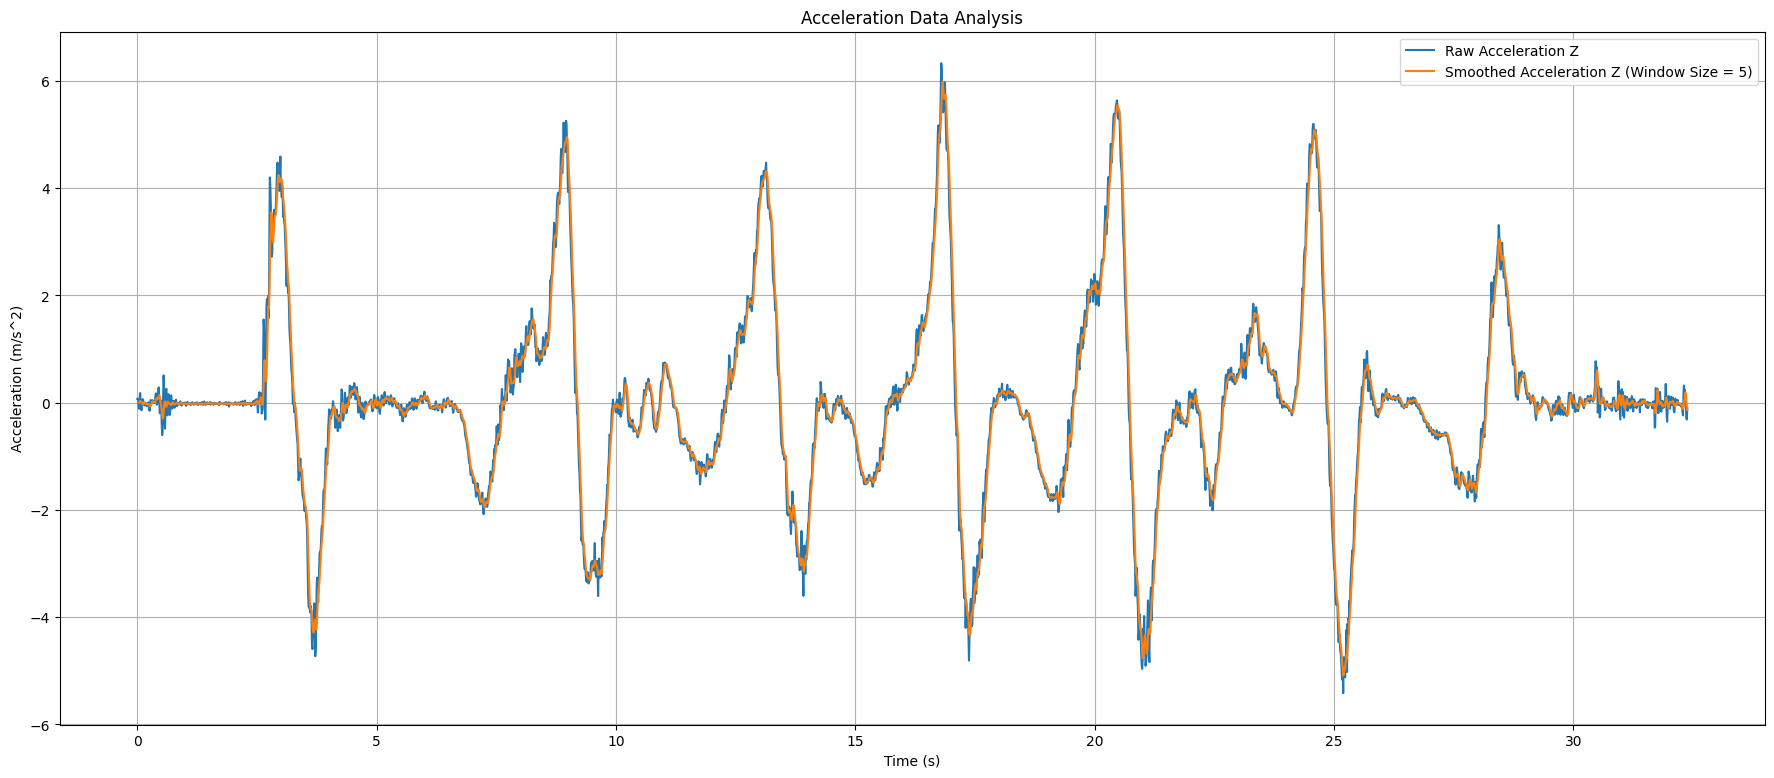

In [8]:
import pandas
import matplotlib.pyplot as plt

df = pandas.read_csv('data/initial_testdata/Raw Data.csv')
acceleration_z = df['Linear Acceleration z (m/s^2)']
time_1 = df['Time (s)']

# Apply a low-pass filter to smooth the acceleration data
window_size = 5
smoothed_acceleration_z = acceleration_z.rolling(window=window_size).mean()
df['Linear Acceleration z (m/s^2)'] = smoothed_acceleration_z

plt.figure(figsize=(22, 9))
plt.plot(time_1, acceleration_z, label='Raw Acceleration Z')
plt.plot(time_1, smoothed_acceleration_z, label=f'Smoothed Acceleration Z (Window Size = {window_size})')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration Data Analysis')
plt.legend()
plt.grid()
plt.show()

### Peak detection

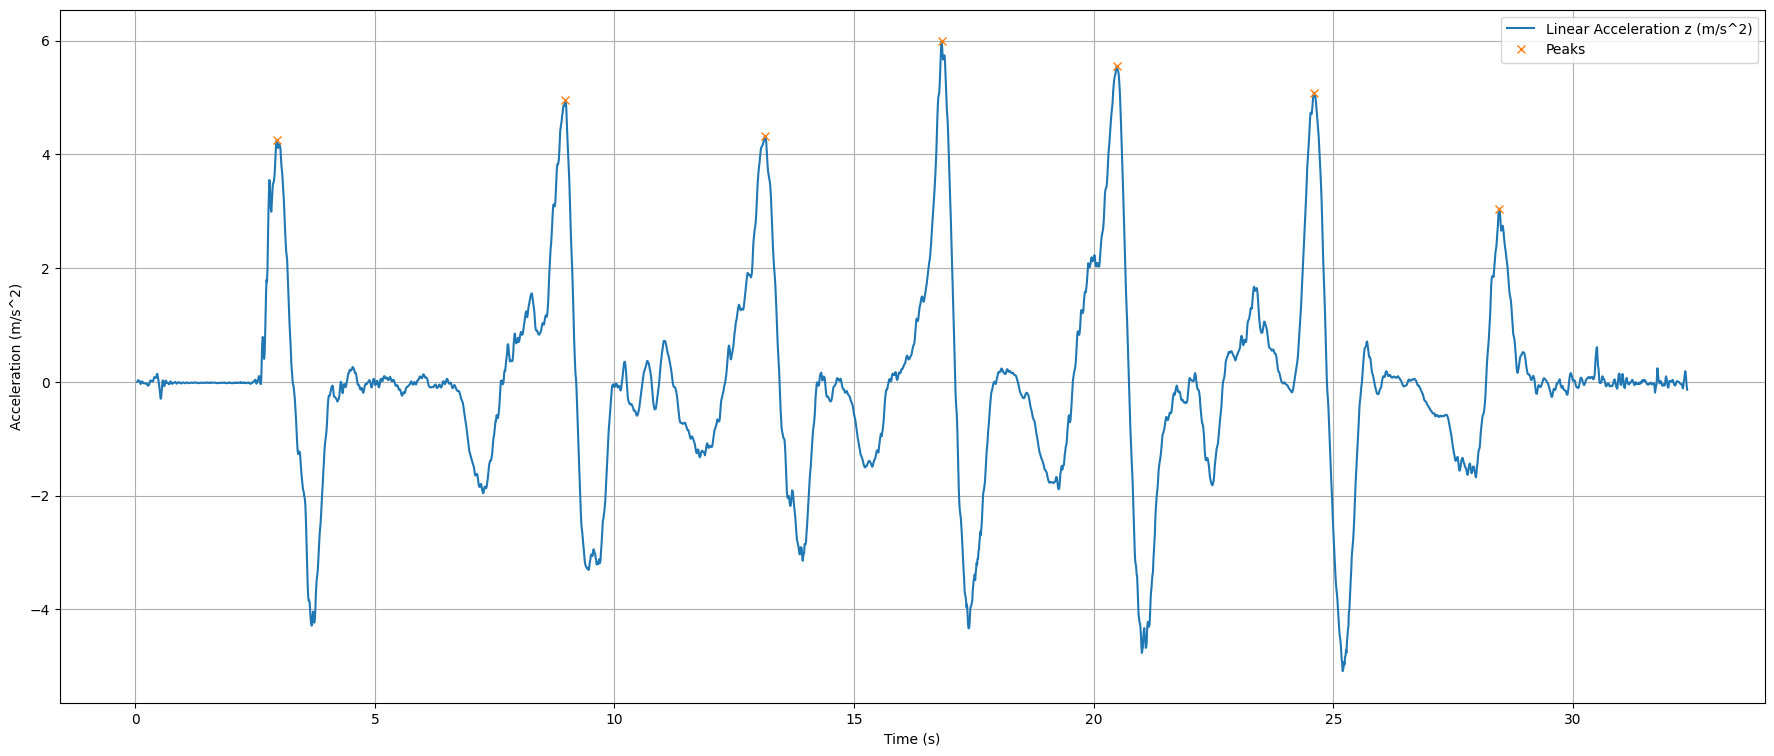

In [16]:
import numpy as np
from scipy.signal import find_peaks

# set some parameters for the peak detection algorithm
prominence_threshold = 2
distance_between_peaks = 300

# detect the peaks in the acceleration data
peaks, _ = find_peaks(df['Linear Acceleration z (m/s^2)'].values, prominence=prominence_threshold, distance=distance_between_peaks)

# plot the acceleration data with the detected peaks
plt.figure(figsize=(22, 9))
plt.plot(df['Time (s)'], df['Linear Acceleration z (m/s^2)'], label='Linear Acceleration z (m/s^2)')
plt.plot(df['Time (s)'][peaks], df['Linear Acceleration z (m/s^2)'][peaks], 'x', label='Peaks')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.grid()
plt.show()

# calculate the displacement and energy for each movement
movements = []
for i in range(len(peaks) - 1):
  # select the data for the current movement
  start_index = peaks[i]
  end_index = peaks[i+1]
  movement_data = df.loc[start_index:end_index]

  # calculate the displacement of the movement by integrating the acceleration
  dt = np.mean(np.diff(movement_data['Time (s)']))
  vz = np.cumsum(movement_data['Linear Acceleration z (m/s^2)']) * dt
  sz = np.cumsum(vz) * dt
  displacement = sz.iloc[-1]

  # calculate the energy of the movement using the work-energy principle
  mass = 50  # kg
  g = 9.81  # m/s^2
  work = mass * g * displacement
  energy = work + 0.5 * mass * (vz.iloc[-1] ** 2)

  # add the movement data and calculated values to the movements list
  movements.append({
    'start_time': movement_data['Time (s)'].iloc[0],
    'end_time': movement_data['Time (s)'].iloc[-1],
    'displacement': displacement,
    'energy': energy
  })

### Baseline

In [14]:
"""Calculate the baseline comparison, assuming that for each repetition, the travelled distance of the body was 0.3m up and 0.3m down. The weight of the body is 50kg. The acceleration due to gravity is 9.81m/s^2."""
mass = 50
g = 9.81
distance_up = 0.3
distance_down = 0.3

mgh0 = mass * g * 1
mgh1 = mass * g * (1+distance_up)

total_energy_spent = mgh1 - mgh0
print(f"Total energy spent for {1} movement: {total_energy_spent:.2f}J")

Total energy spent for 1 movement: 147.15J


### One repetition

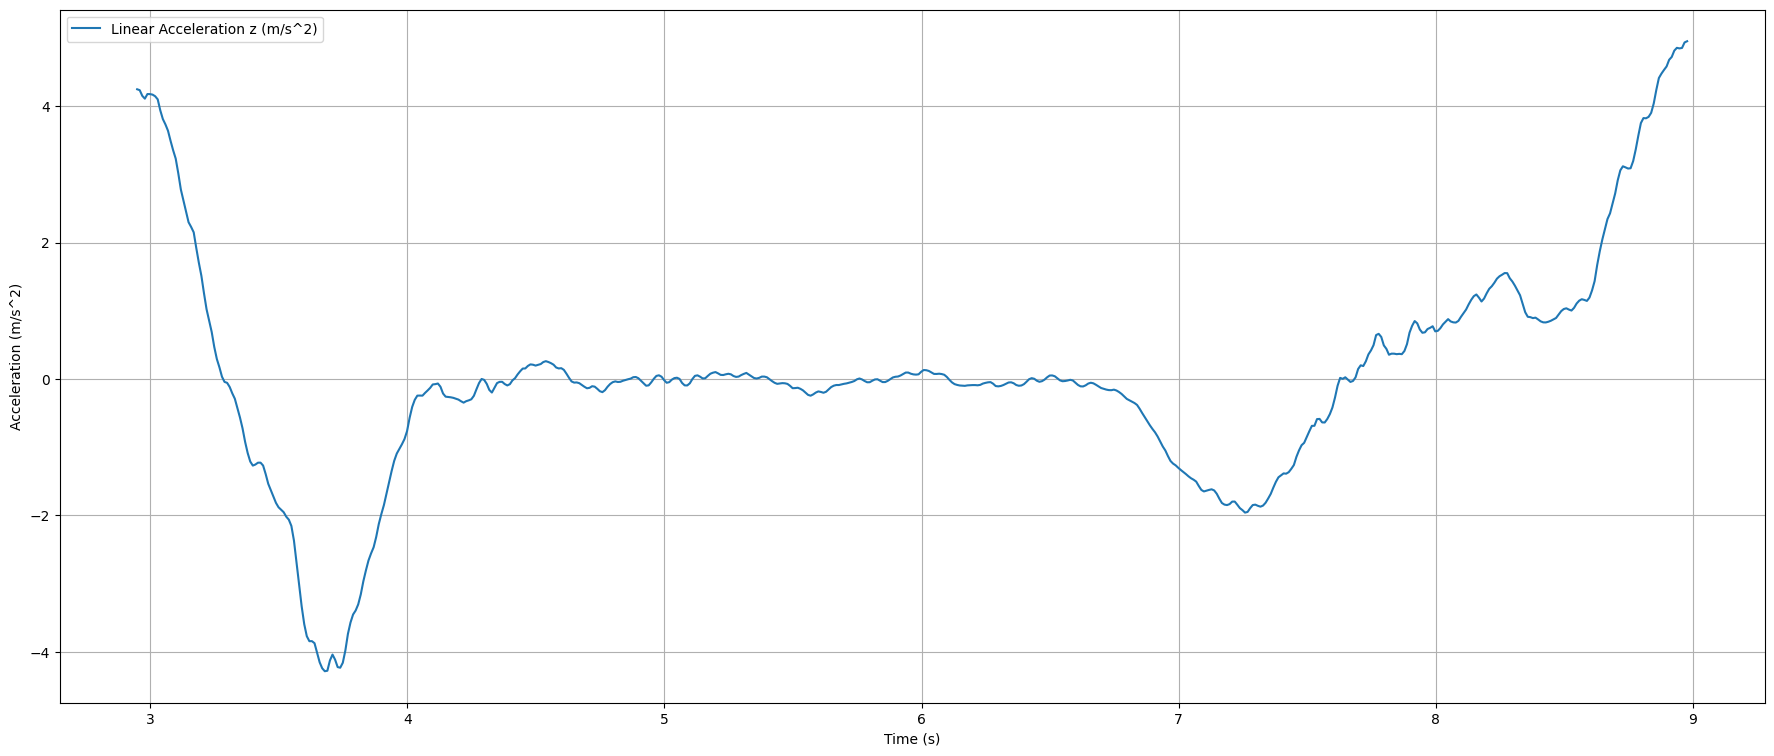

In [17]:
first_movement_data = df.loc[peaks[0]:peaks[1]]

# plot the acceleration data with the detected peaks
plt.figure(figsize=(22, 9))
plt.plot(first_movement_data['Time (s)'], first_movement_data['Linear Acceleration z (m/s^2)'], label='Linear Acceleration z (m/s^2)')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.grid()
plt.show()